In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv("bankruptcy-prevention.csv",sep = ';', header = 0)

In [3]:
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
bank.rename(columns={' management_risk': 'management_risk'}, inplace=True)
bank.rename(columns={' financial_flexibility': 'financial_flexibility'}, inplace=True)
bank.rename(columns={' credibility': 'credibility'}, inplace=True)
bank.rename(columns={' competitiveness': 'competitiveness'}, inplace=True)
bank.rename(columns={' operating_risk': 'operating_risk'}, inplace=True)
bank.rename(columns={' class': 'class'}, inplace=True)

In [5]:
bank.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
bank.shape

(250, 7)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


# Cheaking if there are null values or not

In [8]:
bank.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [9]:
#check distribution of the 'target variable=class'
bank.groupby('class').count() 

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
class,,,,,,
bankruptcy,107,107,107,107,107,107
non-bankruptcy,143,143,143,143,143,143


In [10]:
bankrupt = bank.iloc[:,:]
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# Converting class values into numeeric value where bankruptcy = 0, non-bankruptcy = 1

In [11]:
bankrupt["class_chg"]=""


In [12]:
bankrupt.loc[bankrupt['class'] == 'bankruptcy', 'class_chg'] = 1
bankrupt.loc[bankrupt['class'] == 'non-bankruptcy', 'class_chg'] = 0

In [13]:
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_chg
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,0
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,0
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,0
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,0


In [14]:
bankrupt.drop("class",inplace=True,axis=1)

In [15]:
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_chg
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0


# Exploratory Data Analysis (EDA) 

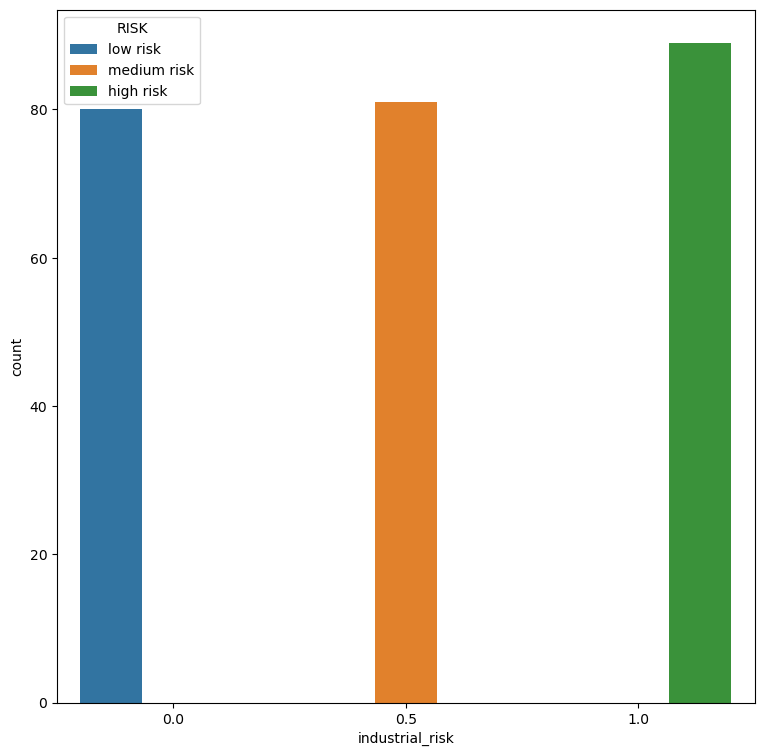

In [16]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.countplot(data=bankrupt, x='industrial_risk',hue='industrial_risk')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

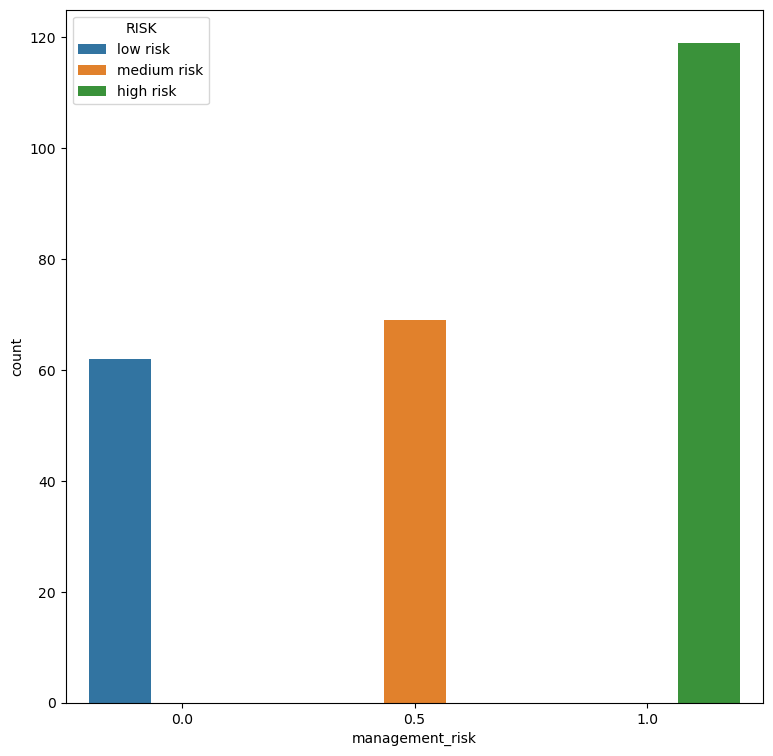

In [17]:

import seaborn as sns
plt.figure(figsize=(9,9))
sns.countplot(data=bankrupt, x='management_risk',hue='management_risk')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

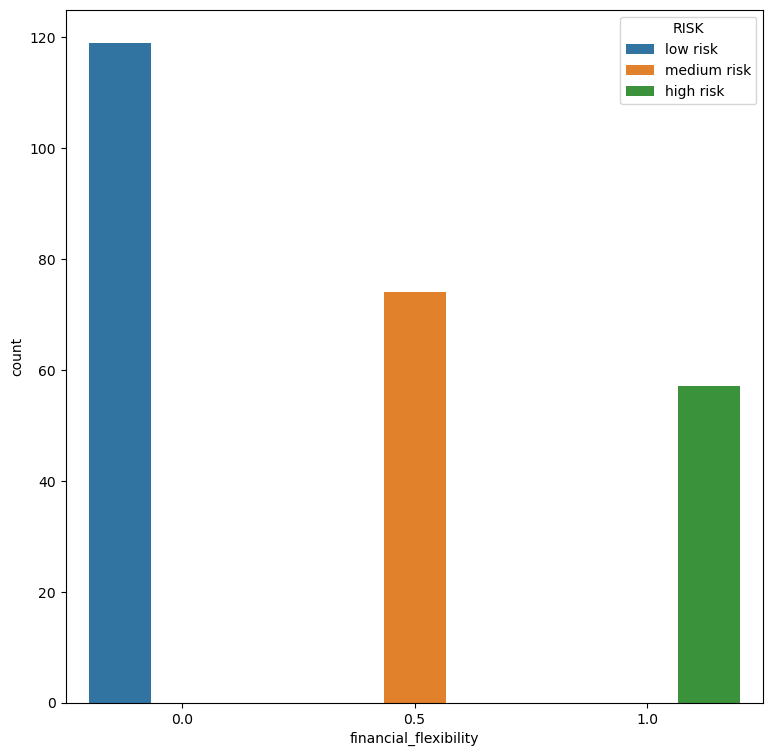

In [18]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.countplot(data=bankrupt, x='financial_flexibility',hue='financial_flexibility')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

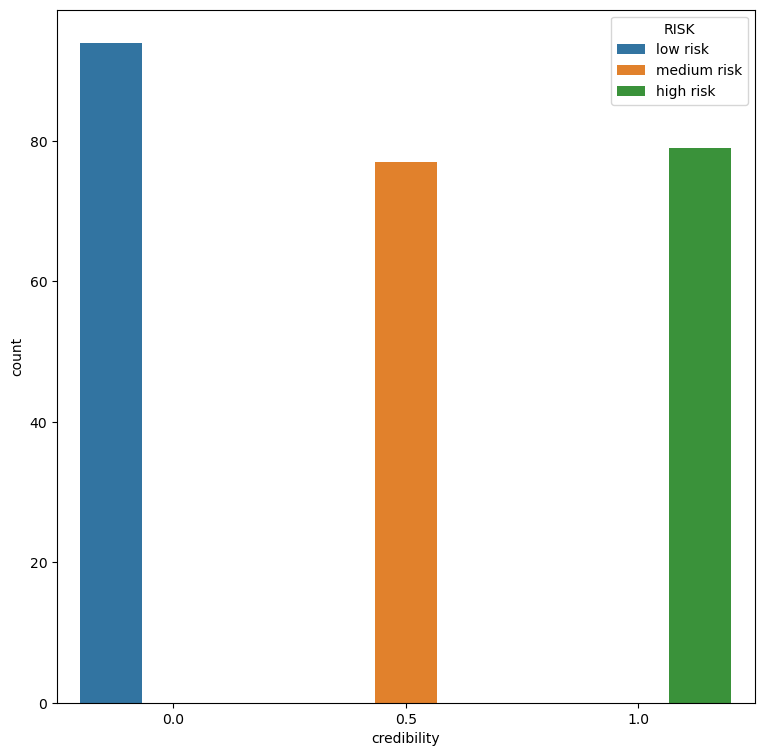

In [19]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.countplot(data=bankrupt, x='credibility',hue='credibility')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

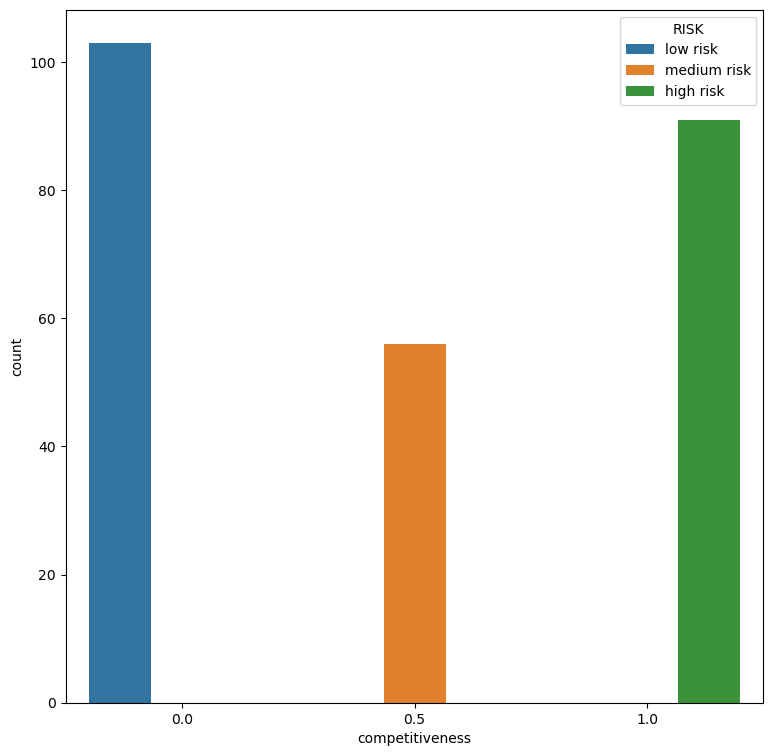

In [20]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.countplot(data=bankrupt, x='competitiveness',hue='competitiveness')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

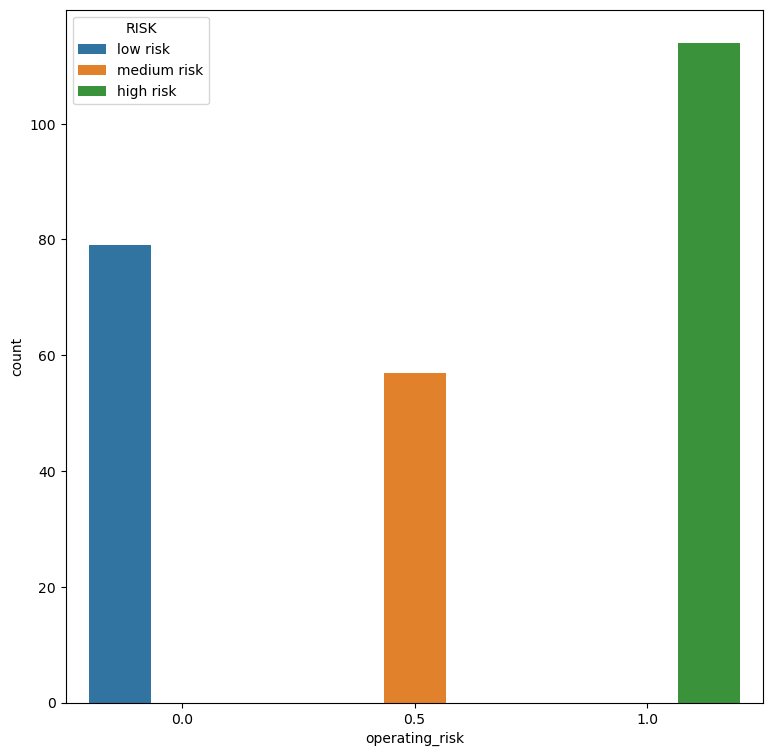

In [21]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.countplot(data=bankrupt, x='operating_risk',hue='operating_risk')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

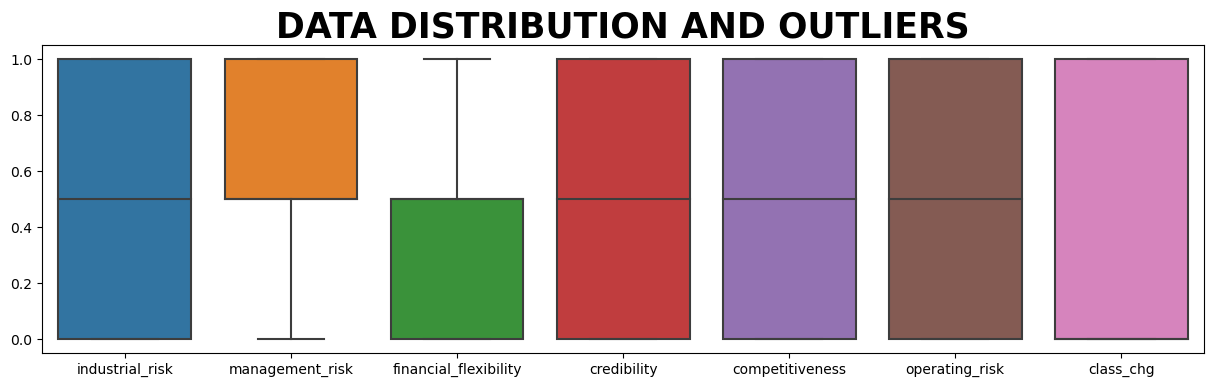

In [22]:
plt.subplots(figsize=(15,4),dpi=100) 
sns.boxplot(data=bankrupt)
plt.title('DATA DISTRIBUTION AND OUTLIERS',fontsize=25,fontweight='bold',color='black') 
plt.show()

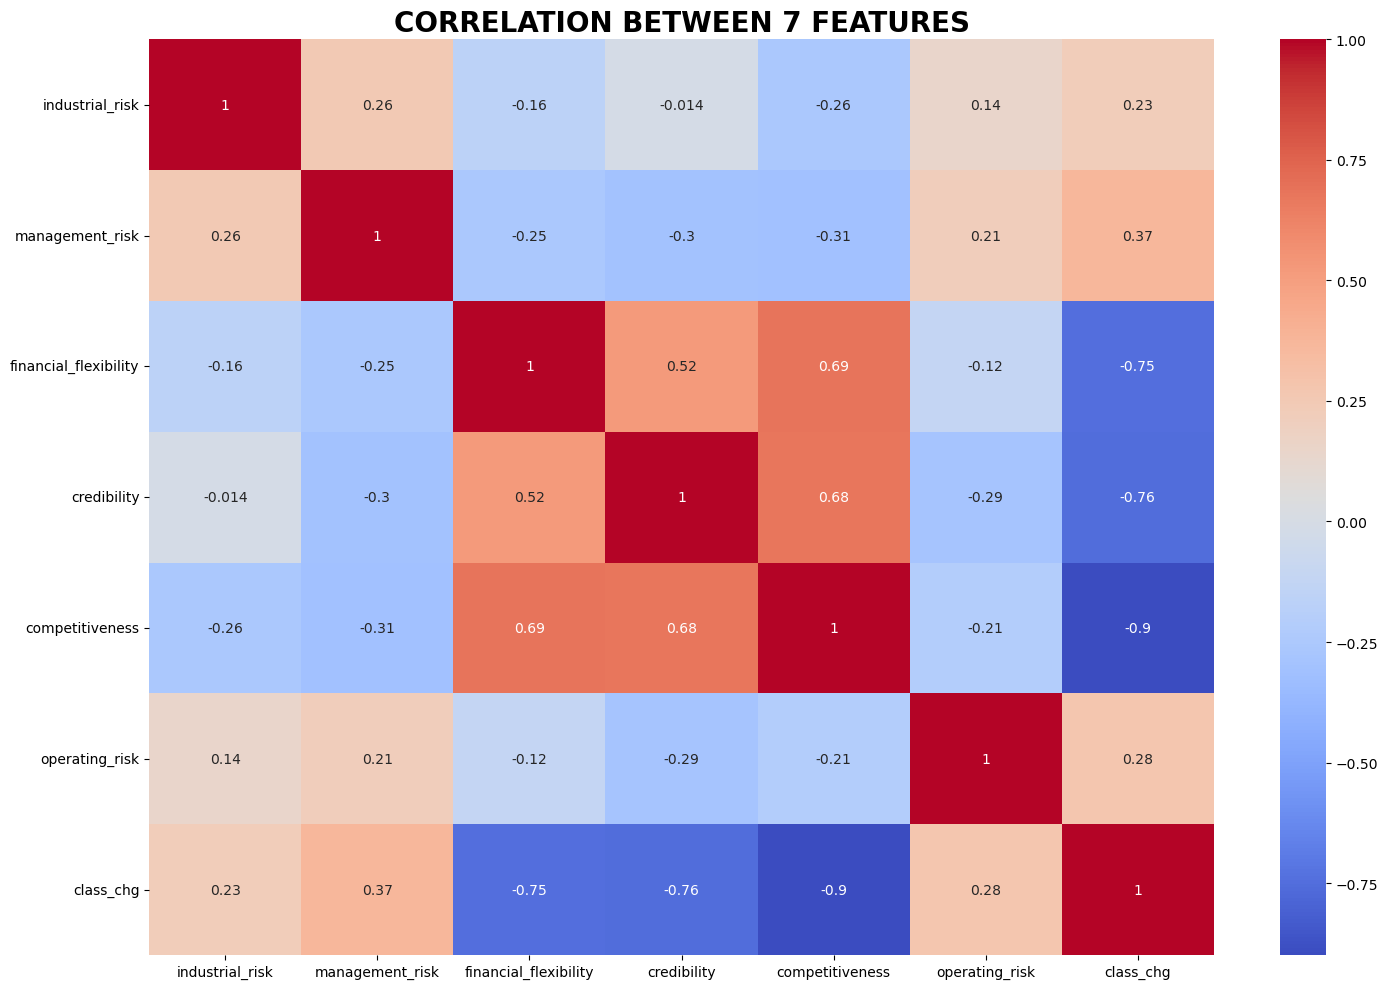

In [23]:
#Correlation between the features 
plt.figure(figsize=(15,10)) 
sns.heatmap(bankrupt.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('CORRELATION BETWEEN 7 FEATURES', color='black', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', colors='black')
plt.tight_layout()  


# Spliting data into x and y

In [24]:
x = bankrupt.iloc[:,0:6]
y = bankrupt.iloc[:,6:]

In [25]:
x

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [26]:
y

,class_chg
0,1
1,1
2,1
3,1
4,1
...,...
245,0
246,0
247,0
248,0


#  Spliting data into train and test

In [27]:
from sklearn.model_selection import train_test_split # trian and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

# Model Buiding